In [1]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train'

/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train


In [3]:
  import tensorflow
  from tensorflow.keras import layers as L
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.models import Model
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout,Input


  import numpy as np
  import cv2
  import matplotlib.pyplot as plt
  import os
  import random

image size : (250, 250, 3)


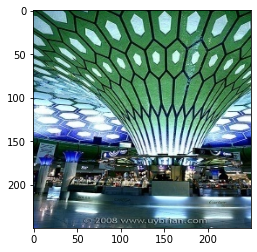

image size : (250, 250, 3)


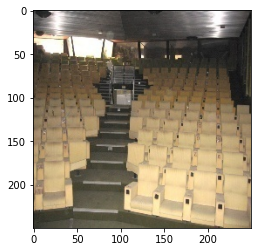

image size : (250, 250, 3)


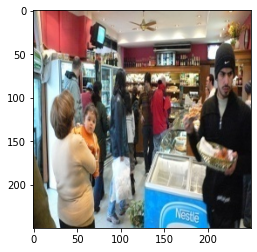

image size : (250, 250, 3)


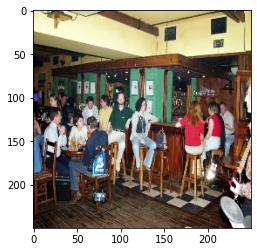

image size : (250, 250, 3)


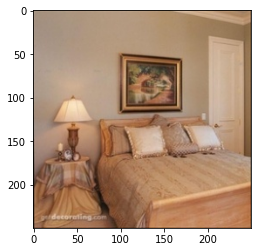

image size : (250, 250, 3)


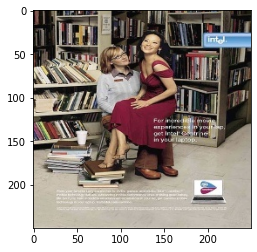

image size : (250, 250, 3)


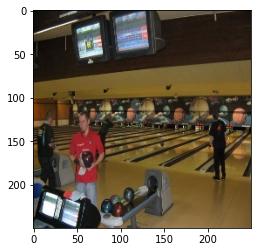

image size : (250, 250, 3)


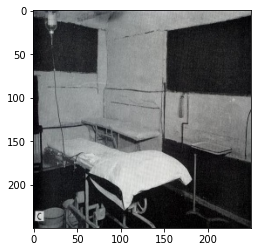

image size : (250, 250, 3)


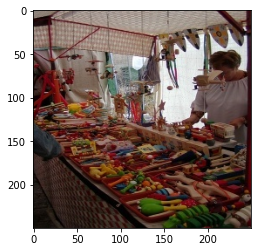

no of images in dataset: 2450


In [ ]:
root_dir = '/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train'
folders = ['airport_inside','auditorium','bakery','bar','bedroom','bookstore','bowling','operating_room','toystore']
num_files = 0
for folder in folders:
    folder_dir = os.path.join(root_dir,folder) 
    files = os.listdir(folder_dir)
    num_files+=len(files)
    img = random.choice(files)
    img_dir = os.path.join(folder_dir,img)
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    print("image size : {}".format(img.shape))
    plt.imshow(img)
    plt.show()
print("no of images in dataset: {}".format(num_files))

In [ ]:
data_gen = ImageDataGenerator(rotation_range=30 ,
                              horizontal_flip=True, 
                              rescale = 1/255.0,
                             validation_split=0.1)
train_generator = data_gen.flow_from_directory(root_dir,
                                              target_size = (224,224),
                                              batch_size = 16,
                                              #class_mode = 'binary',
                                               color_mode = 'rgb',
                                               subset='training',shuffle=True
                                              )

valid_generator = data_gen.flow_from_directory(root_dir,
                                              target_size = (224,224),
                                              batch_size = 16,
                                              #class_mode = 'binary',
                                               color_mode = 'rgb',
                                               subset='validation',shuffle=True
                                              )

Found 2208 images belonging to 9 classes.
Found 242 images belonging to 9 classes.


In [ ]:
from tensorflow.keras.applications import VGG19
import pandas as pd
import keras
from tensorflow.keras import backend as K

def create_vgg(input_dims=(224,224,3)):
    vgg19 = VGG19(
        include_top=False, weights='imagenet', 
        input_shape=input_dims
    )
    img = Input(input_dims,dtype=tensorflow.float32)
    x = vgg19(img)
    x = MaxPool2D((7,7))(x)
    x = Flatten()(x)
    x = Dense(9,activation='sigmoid')(x)
    model = Model(img,x)
    
    return model
model = create_vgg()
model.summary()
model.predict(np.zeros((13,224,224,3)))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 512)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 20,029,001
Trainable params: 20,029,001
Non-trainable params: 0
_______________________________________________

array([[0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],
       [0.62677026, 0.7055554 , 0.8861831 , 0.53261995, 0.3828428 ,
        0.383457  , 0.17816953, 0.2965256 , 0.68894094],


In [ ]:
model.compile(optimizer= Adam(lr=0.0001), loss = "BinaryCrossentropy",metrics = ['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 5)

In [ ]:
history = model.fit(train_generator,
         epochs = 80, 
          validation_data=valid_generator,
          
         )
model.save('/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/models/9_classes/model1_80.h5')
#model.h5 = epochs = 50,early stopping stopped near epoch number 13,acc = 91,val acc =69
# model1_50.h = epochs = 50, early stopping = Fase, acc = 98 ,val acc = 73
#model1_80.h=epochs=80, classes used=9, erly stopping =Flase, acc = o.9896 ,val acc=0.8283

Epoch 1/80
138/138 [==============================] - 1180s 9s/step - loss: 0.3187 - acc: 0.2871 - val_loss: 0.3047 - val_acc: 0.3678
Epoch 2/80
138/138 [==============================] - 45s 323ms/step - loss: 0.2806 - acc: 0.4135 - val_loss: 0.2513 - val_acc: 0.5083
Epoch 3/80
138/138 [==============================] - 45s 322ms/step - loss: 0.2562 - acc: 0.4683 - val_loss: 0.2379 - val_acc: 0.4793
Epoch 4/80
138/138 [==============================] - 46s 330ms/step - loss: 0.2303 - acc: 0.5385 - val_loss: 0.2118 - val_acc: 0.5992
Epoch 5/80
138/138 [==============================] - 44s 321ms/step - loss: 0.2002 - acc: 0.6110 - val_loss: 0.1657 - val_acc: 0.7107
Epoch 6/80
138/138 [==============================] - 45s 321ms/step - loss: 0.1789 - acc: 0.6685 - val_loss: 0.1946 - val_acc: 0.6446
Epoch 7/80
138/138 [==============================] - 44s 321ms/step - loss: 0.1769 - acc: 0.6726 - val_loss: 0.1572 - val_acc: 0.6983
Epoch 8/80
138/138 [==============================] - 47

Inference

In [4]:
import numpy as np
from tensorflow.keras.models import Model, load_model
import cv2

model = load_model('/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/models/13_classes/model1_50.h5')



Predict Place for All Images Present in the folder

In [5]:
import os
import cv2
path  = "/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore"
a = os.listdir(path)
for i in a:
  path2 = os.path.join(path,i)
  img = cv2.imread(path2)
  img=cv2.resize(img,(224,224))
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
 # plt.imshow(img)
 # plt.show()
  pred = model.predict(img[np.newaxis, :, :, :])
  pred_class = np.argmax(pred)
  print(pred_class,path2)

1/1 [==============================] - 8s 8s/step
12 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/00114320c9df07c3329506.jpg
1/1 [==============================] - 0s 16ms/step
9 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/bookstore_11_17_altavista.jpg
1/1 [==============================] - 0s 42ms/step
9 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/6417.jpg
1/1 [==============================] - 0s 35ms/step
6 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/bookstore_02_03_flickr.jpg
1/1 [==============================] - 0s 20ms/step
6 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/bookstore777.jpg
1/1 [==============================] - 0s 18ms/step
6 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/bookstore/bookstore_10_02_flickr.jpg
1/1 [==============================] - 0s 16ms/step
6 /content/gdrive/MyDrive/

Predict Place by Image


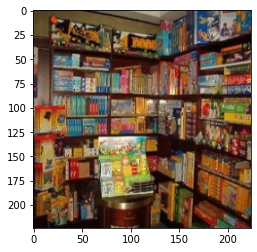

1/1 [==============================] - 0s 17ms/step
12 /content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/toystore/0797089377f6f45f3278042aa1d0631d.jpg


In [10]:
import os
import cv2
path2  = "/content/gdrive/MyDrive/minor_project/indoor_vgg19/dataset_1/train/toystore/0797089377f6f45f3278042aa1d0631d.jpg"


img = cv2.imread(path2)
img=cv2.resize(img,(224,224))
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()
pred = model.predict(img[np.newaxis, :, :, :])
pred_class = np.argmax(pred)
print(pred_class,path2)

In [11]:
if pred_class == 0:
    print("Airport Interior Premises")
elif pred_class == 1:
    print("Artstudio Interior Premises")
elif pred_class == 2:
    print("Auditorium Interior Premises")    
elif pred_class == 3:
    print("Bakery Interior Premises")
elif pred_class == 4:
    print("Bar Interior Premises")
elif pred_class == 5:
    print("BedRoom Interior Premises")
elif pred_class == 6:
    print("BookStore Interior Premises")
elif pred_class == 7:
    print("Bowling Interior Premises")
elif pred_class == 8:
    print("Lobby Interior Premises")
elif pred_class == 9:
    print("Meeting Room Interior Premises")
elif pred_class == 10:
    print("Museum Interior Premises")
elif pred_class == 11:
    print("Operaing Room Interior Premises")
elif pred_class == 12:
    print("Toystore Interior Premises")
else:
      print("Please Enter a Valid Input")

Toystore Interior Premises
